In [1]:
import cv2
import numpy as np
from math import *
from skimage import io
from matplotlib import pyplot as plt

In [4]:
base_data_folder = 'data/'

In [9]:
def show_image(img, title=""):
    plt.figure(figsize=(15,15))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if title:
        plt.title(title)
    
def read_img(filename):
    return cv2.imread(base_data_folder + filename)

In [10]:
imgc = read_img("e1.jpg")

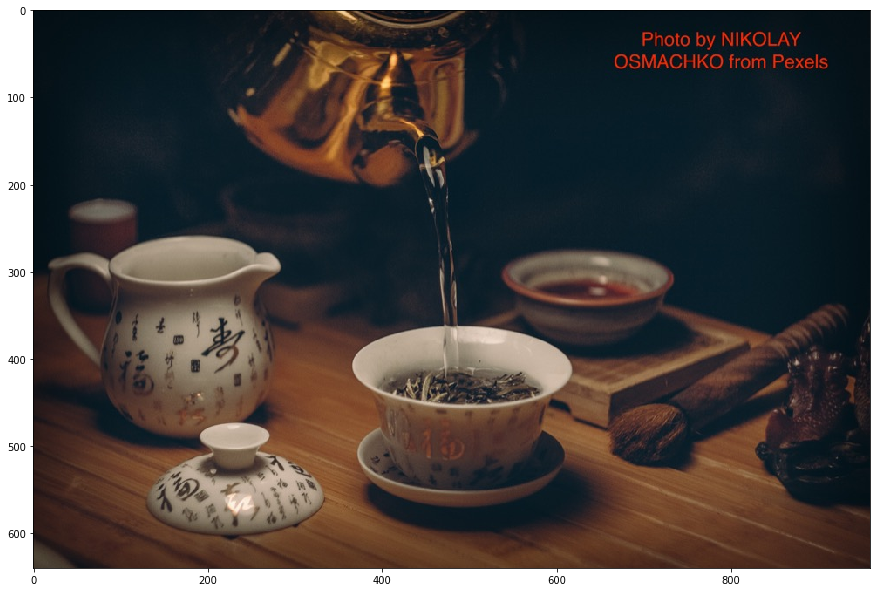

In [11]:
show_image(imgc)

# Implemented by 5 points

[[ 1.00000000e+00 -1.43150926e-01 -4.33622798e+02]
 [-1.43150926e-01  7.15055419e+00 -2.85454121e+03]
 [-4.33622798e+02 -2.85454121e+03  1.36521838e+06]]
Ellipse 
[[-1.31112756e-08]]
[[-1.01135811e-08]]
[[-1.43336365e-08]]
[[-1.60944182e-08]]
[[-1.56578608e-08]]
u =  [[-3.17619447e-04  6.51716385e-01  7.58462690e-01]
 [-2.09090136e-03 -7.58461504e-01  6.51714489e-01]
 [ 9.99997764e-01 -1.37887347e-03  1.60357680e-03]]
m1v.T =  [[-3.17619447e-04  6.51716385e-01  7.58462690e-01]
 [-2.09090136e-03 -7.58461504e-01  6.51714489e-01]
 [ 9.99997764e-01 -1.37887347e-03  1.60357680e-03]]
v =  [[-3.17619447e-04 -2.09090136e-03  9.99997764e-01]
 [ 6.51716385e-01 -7.58461504e-01 -1.37887347e-03]
 [-7.58462690e-01 -6.51714489e-01 -1.60357680e-03]]
usv =  [[ 1.00000000e+00 -1.43150926e-01 -4.33622798e+02]
 [-1.43150926e-01  7.15055419e+00 -2.85454121e+03]
 [-4.33622798e+02 -2.85454121e+03  1.36521838e+06]]


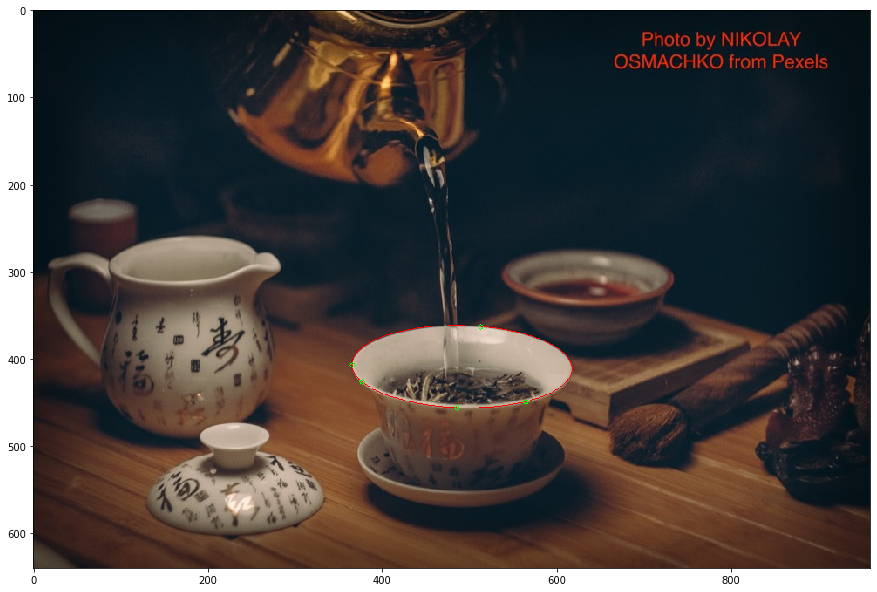

In [12]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449] ], np.double)

m = np.zeros((5,5))
r = np.zeros((5,1))

for k in range(0, len(points)):
    m[k][0] = 2*points[k][0]*points[k][1]
    m[k][1] = points[k][1]*points[k][1]
    m[k][2] = 2*points[k][0]
    m[k][3] = 2*points[k][1]
    m[k][4] = 1
    r[k] = points[k][0]*points[k][0]
    
p = -np.matmul(np.linalg.inv(m), r)

# p[0]=H  p[1]=B  p[2]=G  p[3]=F  p[4]=C
E = np.array(
      [[  1, p[0], p[2]],
      [p[0], p[1], p[3]],
      [p[2], p[3], p[4]] ], np.double )

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
    print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )

# find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )



# draw ellipse
for alpha in range(0,360):
    a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
    a1 = (a1/a1[2])
    a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
    a2 = (a2/a2[2])
    cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
    cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
    
show_image(img)

# Implemented by 6 points

In [28]:
def get_ellipse(points, show_logs=True):
    m = np.zeros((len(points) ,6))

    for k in range(0, len(points)):
        m[k][0] = points[k][0]**2
        m[k][1] = 2*points[k][0]*points[k][1]
        m[k][2] = points[k][1]**2
        m[k][3] = 2*points[k][0]
        m[k][4] = 2*points[k][1]
        m[k][5] = 1

    mu, ms, mv = np.linalg.svd(m)

    R = mv[5, :]
    R /= R[0]

    E = np.array(
          [
              [R[0], R[1], R[3]],
              [R[1], R[2], R[4]],
              [R[3], R[4], R[5]] 
          ], np.double
    )
    
    if show_logs:
        print(E)
        print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")
        # result on given points:
        for k in range(0, len(points)):
            print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
    
    u, s, v = np.linalg.svd(E)
    u2 = np.matmul(u, np.diag(np.sqrt(s)))
    H = np.linalg.inv(u2.T)
    
    return H

def draw_ellipse(img, H, points):
    for alpha in range(0,360):
        a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
        a1 = (a1/a1[2])
        a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
        a2 = (a2/a2[2])
        cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

    for k in range(0, len(points)):
        cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))

    show_image(img)

[[ 1.00000000e+00 -1.37922291e-01 -4.35976748e+02]
 [-1.37922291e-01  7.17879365e+00 -2.86871404e+03]
 [-4.35976748e+02 -2.86871404e+03  1.37225199e+06]]
Ellipse 
[[9.41474702]]
[[-2.5842702]]
[[-12.27094495]]
[[9.45449319]]
[[-7.59278666]]
[[3.57905726]]
u =  [[-3.24168765e-04  6.51707943e-01  7.58469941e-01]
 [-2.08332125e-03 -7.58468775e-01  6.51706051e-01]
 [ 9.99997777e-01 -1.36887380e-03  1.60358889e-03]]
m1v.T =  [[-3.24168765e-04  6.51707943e-01  7.58469941e-01]
 [-2.08332125e-03 -7.58468775e-01  6.51706051e-01]
 [ 9.99997777e-01 -1.36887380e-03  1.60358889e-03]]
v =  [[-3.24168765e-04 -2.08332125e-03  9.99997777e-01]
 [ 6.51707943e-01 -7.58468775e-01 -1.36887380e-03]
 [-7.58469941e-01 -6.51706051e-01 -1.60358889e-03]]
usv =  [[ 1.00000000e+00 -1.22400765e-01 -4.41972210e+02]
 [-1.22400765e-01  7.09191119e+00 -2.84038921e+03]
 [-4.41972210e+02 -2.84038921e+03  1.36339271e+06]]


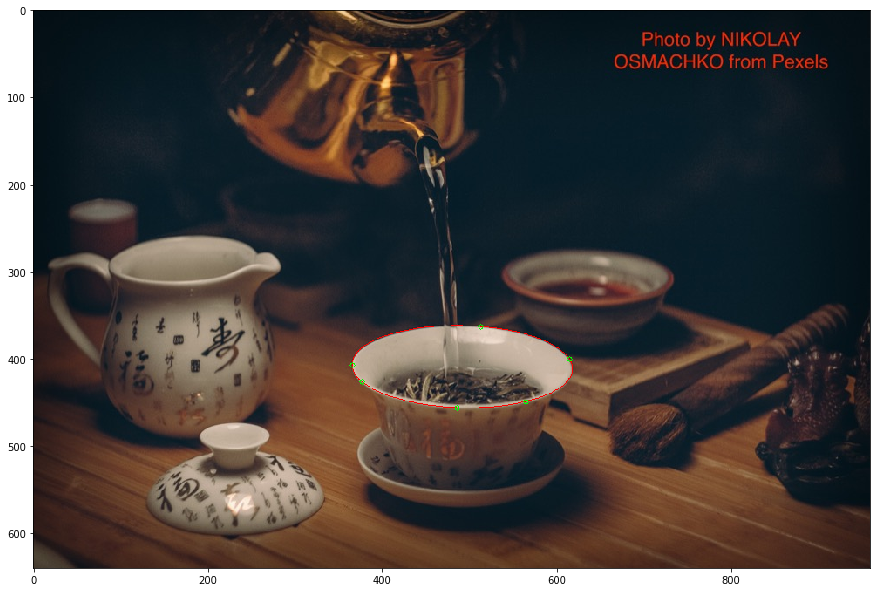

In [23]:
img = imgc.copy()

points = np.array([[366, 407], [513, 363], [377, 426], [486, 456], [565, 449], [615, 400]], np.double)

H = get_ellipse(points)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )

draw_ellipse(img, H, points)

# Max deviation relation

In [31]:
def get_max_deviation(H1, H2):
    max_dev = 0
    
    for alpha in range(0,360):
        a1 = np.matmul( H1, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
        a1 = (a1/a1[2])
        a2 = np.matmul( H2, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
        a2 = (a2/a2[2])
        max_dev = max(max_dev, np.linalg.norm(a1-a2))
    
    return max_dev

def get_random_normal_points(points, sigma):
    random_normal_points = np.zeros(points.shape, np.double)
    
    for (i, point) in enumerate(points):
        random_normal_points[i][0] = np.random.normal(point[0], sigma, 1)[0]
        random_normal_points[i][1] = np.random.normal(point[1], sigma, 1)[0]
        
    return random_normal_points

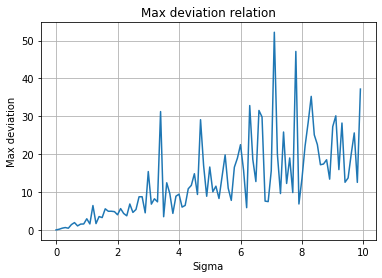

In [33]:
np.random.seed(1)

data = [[], []]

H = get_ellipse(points, False)

for sigma in np.arange(0,10,0.1):    
    random_normal_points = get_random_normal_points(points, sigma)
    noise_H = get_ellipse(random_normal_points, False)
    result = get_max_deviation(H, noise_H)
    
    data[0].append(sigma)
    data[1].append(result)

plt.title('Max deviation relation')
plt.xlabel('Sigma')
plt.ylabel('Max deviation')
plt.grid(True)
plt.plot(data[0], data[1])
plt.show()